In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt 
import numpy as np

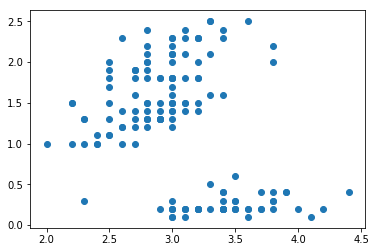

In [2]:
iris = datasets.load_iris()
X, y = iris.data, iris.target
data = X[:,[1,3]] # 为了便于可视化，只取两个维度
plt.scatter(data[:,0],data[:,1]);

In [3]:
def kmeans(data,k=2):
    def _distance(p1,p2):
        """
        Return Eclud distance between two points.
        p1 = np.array([0,0]), p2 = np.array([1,1]) => 1.414
        """
        tmp = np.sum((p1-p2)**2)
        return np.sqrt(tmp)
    def _rand_center(data,k):
        """Generate k center within the range of data set."""
        n = data.shape[1] # features
        centroids = np.zeros((k,n)) # init with (0,0)....
        for i in range(n):
            dmin, dmax = np.min(data[:,i]), np.max(data[:,i])
            centroids[:,i] = dmin + (dmax - dmin) * np.random.rand(k)
        return centroids
    
    def _converged(centroids1, centroids2):
        
        # if centroids not changed, we say 'converged'
         set1 = set([tuple(c) for c in centroids1])
         set2 = set([tuple(c) for c in centroids2])
         return (set1 == set2)
        
    
    n = data.shape[0] # number of entries
    centroids = _rand_center(data,k)
    label = np.zeros(n,dtype=np.int) # track the nearest centroid
    assement = np.zeros(n) # for the assement of our model
    converged = False
    
    while not converged:
        old_centroids = np.copy(centroids)
        for i in range(n):
            # determine the nearest centroid and track it with label
            min_dist, min_index = np.inf, -1
            for j in range(k):
                dist = _distance(data[i],centroids[j])
                if dist < min_dist:
                    min_dist, min_index = dist, j
                    label[i] = j
            assement[i] = _distance(data[i],centroids[label[i]])**2
        
        # update centroid
        for m in range(k):
            centroids[m] = np.mean(data[label==m],axis=0)
        converged = _converged(old_centroids,centroids)    
    return centroids, label, np.sum(assement)

In [4]:
best_assement = np.inf
best_centroids = None
best_label = None

#由于具有随机性，跑10次
for i in range(10):
    centroids, label, assement = kmeans(data,2)
    if assement < best_assement:
        best_assement = assement
        best_centroids = centroids
        best_label = label

data0 = data[best_label==0]
data1 = data[best_label==1]

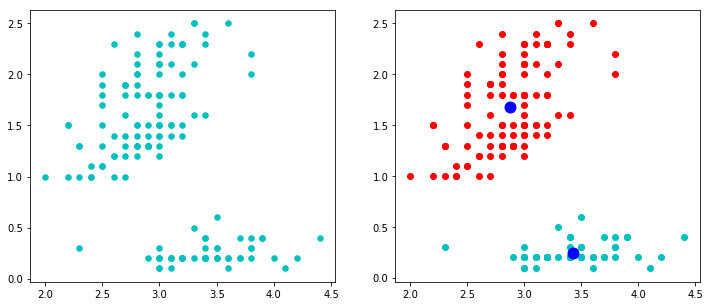

In [5]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
ax1.scatter(data[:,0],data[:,1],c='c',s=30,marker='o')
ax2.scatter(data0[:,0],data0[:,1],c='r')
ax2.scatter(data1[:,0],data1[:,1],c='c')
ax2.scatter(centroids[:,0],centroids[:,1],c='b',s=120,marker='o')
plt.show()